In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import glob
import warnings
warnings.filterwarnings('ignore')


In [2]:
def check_dataset_time_range(filepath):
    """
    Check the time range (min/max years) of a dataset file.
    
    Args:
        filepath: Path to the CSV file
    
    Returns:
        dict with min_year, max_year, data_points, and status
    """
    try:
        df = pd.read_csv(filepath)
        
        if 'time' not in df.columns:
            return {
                'min_year': None,
                'max_year': None,
                'data_points': 0,
                'status': 'Error: No time column'
            }
        
        if len(df) == 0:
            return {
                'min_year': None,
                'max_year': None,
                'data_points': 0,
                'status': 'Error: Empty file'
            }
        
        min_year = int(df['time'].min())
        max_year = int(df['time'].max())
        data_points = len(df)
        
        # Determine status based on max year
        current_year = 2025
        years_behind = current_year - max_year
        
        if max_year >= 2024:
            status = 'Up to date'
        elif max_year >= 2020:
            status = f'{years_behind} years behind'
        elif max_year >= 2015:
            status = f'{years_behind} years behind (Limited)'
        else:
            status = f'{years_behind} years behind (Very Limited)'
        
        return {
            'min_year': min_year,
            'max_year': max_year,
            'data_points': data_points,
            'status': status
        }
    
    except Exception as e:
        return {
            'min_year': None,
            'max_year': None,
            'data_points': 0,
            'status': f'Error: {str(e)}'
        }


def extract_indicator_name(filename):
    """
    Extract indicator name from filename.
    Pattern: ddf--datapoints--{indicator}--by--geo--time.csv
    """
    if 'ddf--datapoints--' in filename and '--by--geo--time.csv' in filename:
        indicator = filename.replace('ddf--datapoints--', '').replace('--by--geo--time.csv', '')
        return indicator
    return filename.replace('.csv', '')


In [3]:
def analyze_all_datasets(base_dir='./data/gapminder'):
    """
    Analyze all datasets in category folders and return a summary DataFrame.
    
    Args:
        base_dir: Base directory containing category folders
    
    Returns:
        DataFrame with time horizon information for all datasets
    """
    base_path = Path(base_dir)
    categories = ["Physical", "Mental", "Social", "Economic", "Environmental", "Cultural"]
    
    results = []
    
    for category in categories:
        category_path = base_path / category
        
        if not category_path.exists():
            print(f"Warning: Category folder '{category}' not found")
            continue
        
        # Find all CSV files in the category folder
        csv_files = list(category_path.glob('ddf--datapoints--*.csv'))
        
        if len(csv_files) == 0:
            print(f"Warning: No datasets found in '{category}' folder")
            continue
        
        print(f"Analyzing {len(csv_files)} datasets in '{category}'...")
        
        for filepath in csv_files:
            indicator = extract_indicator_name(filepath.name)
            time_info = check_dataset_time_range(filepath)
            
            results.append({
                'Category': category,
                'Dataset': indicator,
                'Min Year': time_info['min_year'],
                'Max Year': time_info['max_year'],
                'Year Range': f"{time_info['min_year']}-{time_info['max_year']}" if time_info['min_year'] and time_info['max_year'] else 'N/A',
                'Data Points': time_info['data_points'],
                'Status': time_info['status']
            })
    
    df = pd.DataFrame(results)
    return df


# Run the analysis
print("=" * 70)
print("Analyzing Time Horizons for All Datasets")
print("=" * 70)
print()

results_df = analyze_all_datasets()

print(f"\n✅ Analysis complete! Found {len(results_df)} datasets across {results_df['Category'].nunique()} categories.")


Analyzing Time Horizons for All Datasets

Analyzing 3 datasets in 'Physical'...
Analyzing 2 datasets in 'Mental'...
Analyzing 7 datasets in 'Social'...
Analyzing 6 datasets in 'Economic'...
Analyzing 8 datasets in 'Environmental'...
Analyzing 6 datasets in 'Cultural'...

✅ Analysis complete! Found 32 datasets across 6 categories.



PHYSICAL (3 datasets)
                        Dataset  Min Year  Max Year Year Range  Data Points                         Status
body_mass_index_bmi_men_kgperm2      1975      2016  1975-2016         8022       9 years behind (Limited)
      suicide_per_100000_people      2000      2021  2000-2021         4070                 4 years behind
   data_quality_life_expectancy      1760      2014  1760-2014        43592 11 years behind (Very Limited)

  Summary: Average max year = 2017, Range = 2014-2021

MENTAL (2 datasets)
                       Dataset  Min Year  Max Year Year Range  Data Points                         Status
data_quality_income_per_person      1700      2012  1700-2012        18778 13 years behind (Very Limited)
        working_hours_per_week      1969      2025  1969-2025         2511                     Up to date

  Summary: Average max year = 2018, Range = 2012-2025

SOCIAL (7 datasets)
                                        Dataset  Min Year  Max Year Year Range 


OVERALL STATISTICS

Datasets by Maximum Year:
  2025: 4 dataset(s)
  2024: 8 dataset(s)
  2023: 6 dataset(s)
  2022: 2 dataset(s)
  2021: 1 dataset(s)
  2019: 1 dataset(s)
  2016: 1 dataset(s)
  2015: 1 dataset(s)
  2014: 1 dataset(s)
  2012: 1 dataset(s)

Datasets by Status:
  Up to date: 12 dataset(s)
  2 years behind: 6 dataset(s)
  3 years behind: 2 dataset(s)
  14 years behind (Very Limited): 2 dataset(s)
  9 years behind (Limited): 1 dataset(s)
  4 years behind: 1 dataset(s)
  11 years behind (Very Limited): 1 dataset(s)
  13 years behind (Very Limited): 1 dataset(s)
  19 years behind (Very Limited): 1 dataset(s)
  17 years behind (Very Limited): 1 dataset(s)
  6 years behind (Limited): 1 dataset(s)
  15 years behind (Very Limited): 1 dataset(s)
  10 years behind (Limited): 1 dataset(s)
  23 years behind (Very Limited): 1 dataset(s)

Summary Statistics:
  Total datasets analyzed: 32
  Total categories: 6
  Earliest max year: 2002
  Latest max year: 2025
  Average max year: 2019.


Found 20 datasets with max year < 2024:

     Category                                            Dataset  Max Year                         Status
     Cultural                          patent_applications_total      2002 23 years behind (Very Limited)
       Social                  personal_computers_per_100_people      2006 19 years behind (Very Limited)
       Social                        blood_pressure_sbp_men_mmhg      2008 17 years behind (Very Limited)
Environmental                            energy_production_total      2010 15 years behind (Very Limited)
Environmental                    cumulative_co2_emissions_tonnes      2011 14 years behind (Very Limited)
     Cultural                                literacy_rate_adult      2011 14 years behind (Very Limited)
       Mental                     data_quality_income_per_person      2012 13 years behind (Very Limited)
     Physical                       data_quality_life_expectancy      2014 11 years behind (Very Limited)
    

## Datasets with Recent Data (2024+)

Datasets that contain information from 2024 or more recently:


In [8]:
# Filter datasets with max year >= 2024
recent_datasets = results_df[results_df['Max Year'] >= 2024].copy()

if len(recent_datasets) > 0:
    # Sort by category and then by dataset name
    recent_datasets = recent_datasets.sort_values(['Category', 'Dataset'])
    
    print(f"\nFound {len(recent_datasets)} datasets with data from 2024 or more recently:\n")
    
    # Display in a clean table format
    display_cols = ['Category', 'Dataset', 'Max Year', 'Min Year', 'Year Range', 'Data Points']
    print(recent_datasets[display_cols].to_string(index=False))
    
    # Also display grouped by category
    print(f"\n\nGrouped by Category:")
    for category in ["Physical", "Mental", "Social", "Economic", "Environmental", "Cultural"]:
        category_recent = recent_datasets[recent_datasets['Category'] == category]
        if len(category_recent) > 0:
            print(f"\n  {category} ({len(category_recent)} dataset(s)):")
            for _, row in category_recent.iterrows():
                print(f"    - {row['Dataset']} (max year: {int(row['Max Year'])})")
else:
    print("\n⚠️  No datasets found with data from 2024 or more recently.")



Found 12 datasets with data from 2024 or more recently:

     Category                                        Dataset  Max Year  Min Year Year Range  Data Points
     Cultural                 art_coverage_percent_cd4_l_350      2024      2000  2000-2024         3625
     Cultural     males_aged_15_24_unemployment_rate_percent      2025      1948  1948-2025         3392
     Economic          aged_15plus_unemployment_rate_percent      2025      1947  1947-2025         5208
     Economic         dollar_billionaires_per_million_people      2025      1997  1997-2025         1630
     Economic extreme_poverty_percent_people_below_300_a_day      2024      1963  1963-2024         2402
     Economic              income_share_of_richest_10percent      2024      1963  1963-2024         2402
Environmental                         coal_consumption_total      2024      1965  1965-2024         4800
Environmental                   electricity_generation_total      2024      1985  1985-2024         31

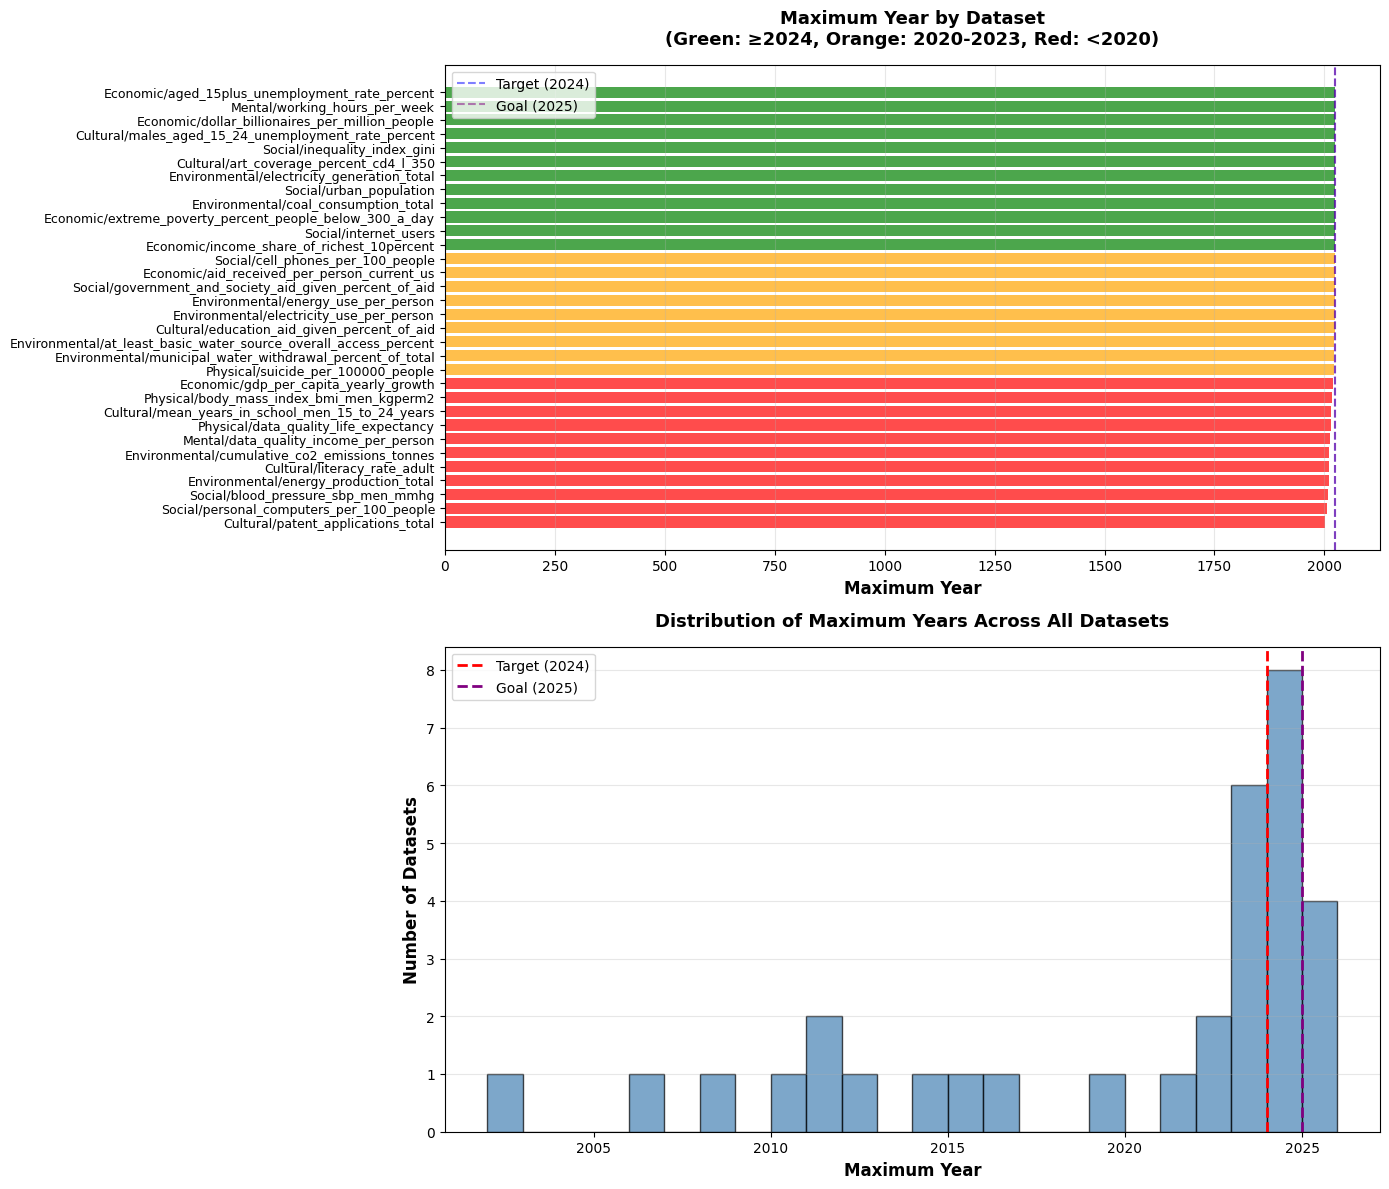


Color Legend:
  Green: Up to date (max year ≥ 2024)
  Orange: Recent but needs update (max year 2020-2023)
  Red: Limited coverage (max year < 2020)
  Gray: Error or missing data
